In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_WD_1= pd.read_csv("df_final_web_data_pt_1.txt")
df_WD_2= pd.read_csv("df_final_web_data_pt_2.txt")
df_demo = pd.read_csv("df_final_demo.txt")
df_experiment_clients= pd.read_csv("df_final_experiment_clients.txt")
#Combining web data
df_web_data = pd.concat([df_WD_1, df_WD_2], ignore_index = True)

In [3]:
# checking for duplicates and nulls

duplicates  = { "df_demo": df_demo.duplicated().sum(),
               "df_experiment_clients": df_experiment_clients.duplicated().sum(),
               "df_web_data":df_web_data.duplicated().sum()}
print(duplicates)

{'df_demo': 0, 'df_experiment_clients': 0, 'df_web_data': 10764}


In [12]:
df_web_data.drop_duplicates(inplace=True, keep='first')

In [5]:
# Check for null values
null_values  = { "df_demo": df_demo.isna().sum(),
               "df_experiment_clients": df_experiment_clients.isna().sum(),
               "df_web_data":df_web_data.isna().sum()}
print(null_values)

{'df_demo': client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64, 'df_experiment_clients': client_id        0
Variation    20109
dtype: int64, 'df_web_data': client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64}


In [6]:
# we replace the numerical values with median, because it wont be affected by the outliers.

numeric_columns = df_demo.select_dtypes(include = "number").columns
for col in numeric_columns:
    df_demo[col] = df_demo[col].fillna(df_demo[col].median())

In [7]:
#And the categorical values by mode

categorical_columns = df_demo.select_dtypes(include = "object").columns
for col in categorical_columns:
    df_demo[col] = df_demo[col].fillna(df_demo[col].mode()[0])

In [8]:
df_demo["gendr"] = df_demo["gendr"].fillna(df_demo["gendr"].mode()[0])

In [9]:
# Checking for outliers:

# Columns to check for outliers
cols_to_check = ['clnt_age', 'bal', 'calls_6_mnth', 'logons_6_mnth']

outliers = {}

# Detect outliers using IQR method
for col in cols_to_check:
    Q1 = df_demo[col].quantile(0.25)
    Q3 = df_demo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df_demo[(df_demo[col] < lower_bound) | (df_demo[col] > upper_bound)].shape[0]

outliers

{'clnt_age': 0, 'bal': 8021, 'calls_6_mnth': 0, 'logons_6_mnth': 0}

# EDA
- Finding out the primary clients in the process? 
    whether they are young or old, new or long-term clients?

In [10]:
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


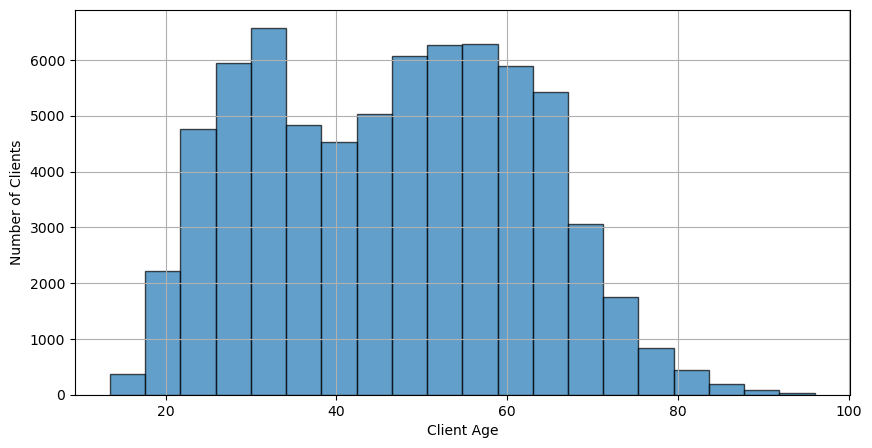

In [11]:
plt.figure(figsize= (10,5))
plt.hist(df_demo["clnt_age"], bins = 20 ,edgecolor= "k" , alpha = 0.7)   # alpha is for transparency   , k is a color code
plt.xlabel("Client Age")
plt.ylabel("Number of Clients")
plt.grid(True, which = "both")
plt.show()

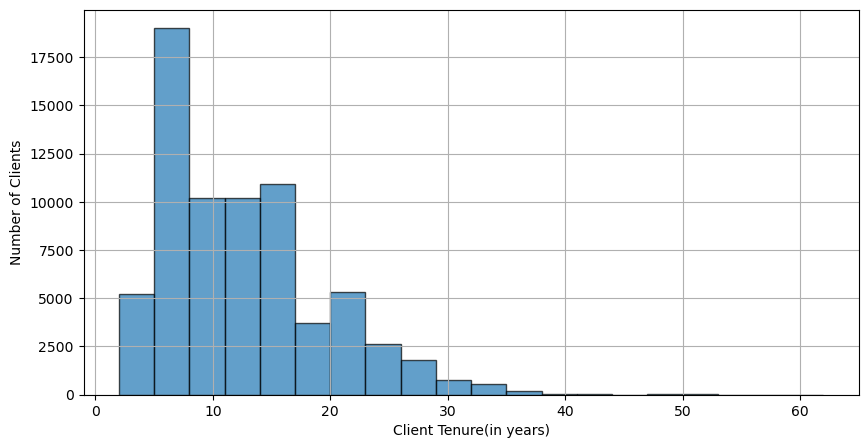

In [36]:
plt.figure(figsize= (10,5))
plt.hist(df_demo["clnt_tenure_yr"], bins = 20 ,edgecolor= "k", alpha = 0.7 )   # alpha is for transparency   , k is a color code
plt.xlabel("Client Tenure(in years)")
plt.ylabel("Number of Clients")
plt.grid(True, which = "both")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x14df32a60f0>,
 'caps': [<matplotlib.lines.Line2D at 0x14df32a68d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14df337b200>],
 'medians': [<matplotlib.lines.Line2D at 0x14df32a6f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14df32a7260>],
 'means': []}

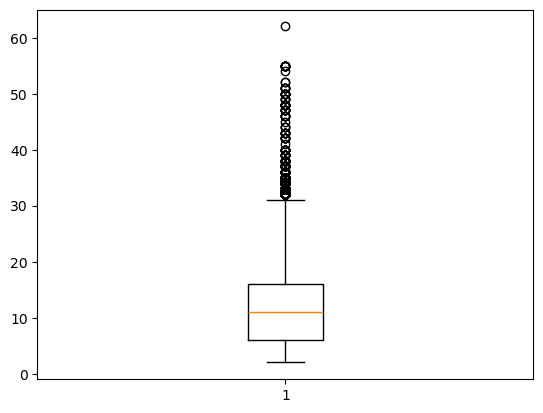

In [37]:
plt.boxplot(df_demo["clnt_tenure_yr"])

In [15]:
((df_demo["clnt_tenure_yr"]).max()-(df_demo["clnt_tenure_yr"]).min())/20

3.0

gendr
U    24139
M    23724
F    22746
Name: count, dtype: int64


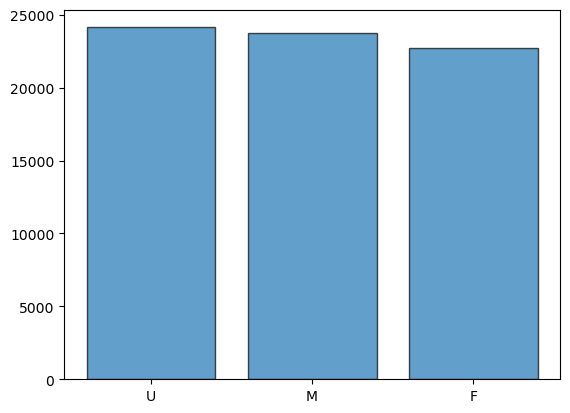

In [18]:
# Gender

#df_final["gender"].replace("X", "U", inplace= True) # replacing "X" with "U"  # Another method to replace

df_demo["gendr"]=df_demo["gendr"].map({"X":"U", "M":"M","F":"F", "U":"U"})
gender_counts = df_demo["gendr"].value_counts()
print(gender_counts)

plt.bar(gender_counts.index, gender_counts.values, edgecolor = 'k', alpha = 0.7)
plt.show()

In [25]:
((df_demo["clnt_tenure_yr"]).max()-(df_demo["clnt_tenure_yr"]).max())/20

0.0

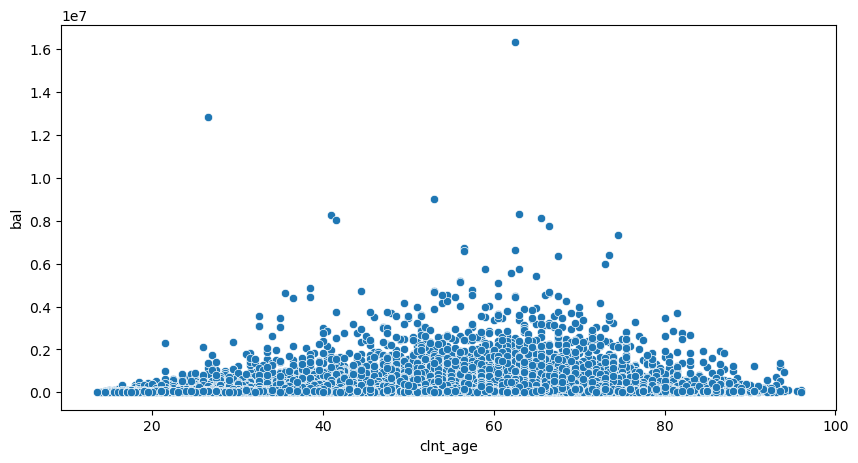

In [26]:
# Relationship analysis
plt.figure(figsize=(10,5))

sns.scatterplot(x = df_demo["clnt_age"], y = df_demo["bal"])
plt.show()

In [20]:
print(df_demo["clnt_age"].corr(df_demo["bal"], method="pearson"))
print(df_demo["clnt_age"].corr(df_demo["bal"], method="spearman"))

0.2095451485605233
0.34304889651858855


In [21]:
df_demo_experiment_merged = pd.merge(df_demo, df_experiment_clients, on = "client_id", how = "left")
df_demo_experiment_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [ ]:
"""explore
number of accounts with balance
check balance between genders
hypothesis testing : with or without outliers e.g. removing values outside IQR
"""

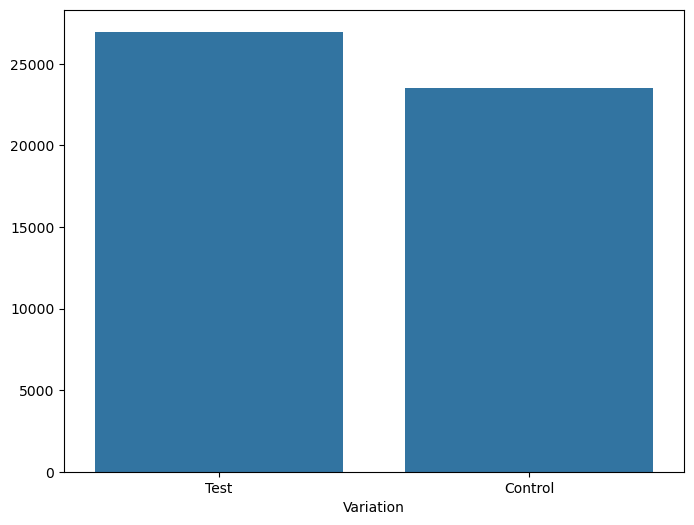

In [24]:
variation_counts = df_demo_experiment_merged["Variation"].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x =variation_counts.index, y = variation_counts.values)
plt.show()

## Hypothesis testing

In [27]:
df_web_data.process_step.unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [28]:
df_web_data.shape

(744641, 5)

In [29]:
#Completion rate = number of users reaching confirm step/total number of users(FIX THIS)

#Using  completion rate = number of confirm steps/ number of total steps

df_web_experiment_merged = df_web_data.merge(df_experiment_clients, on= "client_id", how = "left")
display(df_web_experiment_merged.head())
print(df_web_experiment_merged.shape)

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


(744641, 6)


In [30]:
df_confirmations= df_web_experiment_merged[df_web_experiment_merged["process_step"]=="confirm"]
print(df_confirmations["Variation"].value_counts())

completion_rates = df_confirmations["Variation"].value_counts()/df_web_experiment_merged["Variation"].value_counts()
completion_rates

Variation
Test       25600
Control    17336
Name: count, dtype: int64


Variation
Test       0.144879
Control    0.123356
Name: count, dtype: float64

In [31]:
#H0: The completion Rate for the Test Group = Completion Rate Control
#H1: The completion Rate Test  != Completion Rate Control

# significance level = 0.05

df_confirmations["Variation"].value_counts()

Variation
Test       25600
Control    17336
Name: count, dtype: int64

In [32]:
# Number of successes for each group

count = df_confirmations["Variation"].value_counts()
display(count)

#number of trials
trials = df_web_experiment_merged["Variation"].value_counts()
display(trials)

Variation
Test       25600
Control    17336
Name: count, dtype: int64

Variation
Test       176699
Control    140536
Name: count, dtype: int64

In [33]:
#Proportion z-test   (compare proportion of two groups)

from statsmodels.stats.proportion import proportions_ztest

stats, p_value = proportions_ztest(count, trials)

p_value

2.3502234547775717e-69

In [34]:
#Because our p_value is lower than our significance we can reject the null hypothesis that claimed that the proportions were equal.
# Taking into accout completion rate, we would recommend Vanguard to adopt this new UI. 

In [35]:
#H0: The completion Rate for the Test Group <= Completion Rate Control
#H1: The completion Rate Test  >  Completion Rate Control

# significance level = 0.05

stats, p_value = proportions_ztest(count, trials, alternative = 'smaller')

p_value


1.0

In [36]:
# Using Chi-square -> We check for independence for two categorical variables.

#H0: Variation and Confirmed (step being confirmed ratio) are independent
#H1: Variation and Confirmed have influence on each other

#significance level = 0.05

df_web_experiment_merged["confirmed"] =  df_web_experiment_merged["process_step"].apply(lambda x: True if x == "confirm" else False)
df_web_experiment_merged

,client_id,visitor_id,visit_id,process_step,date_time,Variation,confirmed
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,False
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,False
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,False
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,False
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,False
...,...,...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,False
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,False
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,False
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,False


In [37]:
f_obs = pd.crosstab(df_web_experiment_merged["Variation"], df_web_experiment_merged["confirmed"])
f_obs

confirmed,False,True
Variation,,
Control,123200,17336
Test,151099,25600


In [38]:
p_value = st.chi2_contingency(f_obs)[1]
p_value


2.5773171619152373e-69

# Error rate


In [39]:
#Removing the Variations that are null

df_web_experiment_merged.dropna(subset= "Variation", inplace=True)

In [40]:
# Error rate = number of backward step taken by uses/ total steps taken by users

df_web_experiment_merged["date_time"]= pd.to_datetime(df_web_experiment_merged["date_time"])
df_web_experiment_merged = df_web_experiment_merged.sort_values(by=["client_id","visit_id", "date_time"])   # Sorting the data , per client , per same visit , per time

map_steps = {"start": 0, "step_1": 1, "step_2": 2, "step_3":3, "confirm": 4}
df_web_experiment_merged["step_value"]= df_web_experiment_merged["process_step"].map(map_steps)
df_web_experiment_merged["step_diff"] = df_web_experiment_merged.groupby(["client_id", "visit_id"])["step_value"].diff()
df_web_experiment_merged["is_error"] = df_web_experiment_merged["step_diff"]< 0

df_web_experiment_merged.tail(10)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,confirmed,step_value,step_diff,is_error
106531,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,Test,False,0,-2.0,True
467276,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,Test,False,0,NaN,False
467275,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,Test,False,1,1.0,False
467274,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,False,2,1.0,False
467273,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,False,3,1.0,False
467272,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,True,4,1.0,False
106463,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,False,0,NaN,False
106462,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,Test,False,1,1.0,False
354472,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,False,0,NaN,False
354471,9999832,145538019_54444341400,472154369_16714624241_585315,step_1,2017-05-16 16:46:11,Test,False,1,1.0,False


In [41]:

df_web_experiment_merged[df_web_experiment_merged["visit_id"]=="781255054_21935453173_531117"].sort_values(by="date_time")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,confirmed,step_value,step_diff,is_error
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,False,0,NaN,False
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,False,1,1.0,False
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,False,2,1.0,False
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,False,3,1.0,False
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,False,2,-1.0,True
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,False,3,1.0,False
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,False,2,-1.0,True
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,False,3,1.0,False


In [42]:
df_web_experiment_merged[df_web_experiment_merged["visit_id"]=="781255054_21935453173_531117"].sort_values(by="date_time")["step_value"].diff() 
#example for one specific visit

7    NaN
6    1.0
5    1.0
4    1.0
3   -1.0
2    1.0
1   -1.0
0    1.0
Name: step_value, dtype: float64

In [43]:

df_web_experiment_merged.groupby(["client_id", "visit_id"])["step_value"].diff().value_counts()

step_value
 1.0    188070
 0.0     32690
-1.0     18195
-2.0      3454
-3.0      3445
-4.0       719
 2.0       629
 3.0       547
 4.0        39
Name: count, dtype: int64

In [45]:
df_web_experiment_merged["step_diff"] = df_web_experiment_merged.groupby(["client_id", "visit_id"])["step_value"].diff()

In [46]:
#Calculate error rates for both Test and Control groups
# since boolean values are 0 and 1 , thus mean of all 1's will give the proportion of the 1's out of total 0's and 1's

error_rates = df_web_experiment_merged.groupby("Variation")["is_error"].mean()
error_rates

Variation
Control    0.068175
Test       0.091862
Name: is_error, dtype: float64

In [49]:
df_web_experiment_merged[df_web_experiment_merged["client_id"]==9999729]

,client_id,visitor_id,visit_id,process_step,date_time,Variation,confirmed,step_value,step_diff,is_error
106534,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:21:27,Test,False,0,NaN,False
106533,9999729,843385170_36953471821,493310979_9209676464_421146,step_1,2017-04-20 14:22:49,Test,False,1,1.0,False
106532,9999729,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,Test,False,2,1.0,False
106531,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,Test,False,0,-2.0,True
467276,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,Test,False,0,NaN,False
467275,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,Test,False,1,1.0,False
467274,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,False,2,1.0,False
467273,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,False,3,1.0,False
467272,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,Test,True,4,1.0,False
106463,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,False,0,NaN,False


In [47]:
df_error = df_web_experiment_merged.groupby(["client_id","visit_id"]).agg({"is_error":"max"}).reset_index()

In [50]:
df_error_merged = df_error.merge(df_experiment_clients, on = "client_id")
df_error_merged

,client_id,visit_id,is_error,Variation
0,555,637149525_38041617439_716659,False,Test
1,647,40369564_40101682850_311847,False,Test
2,934,7076463_57954418406_971348,False,Test
3,1028,557292053_87239438319_391157,True,Control
4,1104,543158812_46395476577_767725,False,Control
...,...,...,...,...
69442,9999626,182723364_27031318473_880901,False,Test
69443,9999729,493310979_9209676464_421146,True,Test
69444,9999729,870243567_56915814033_814203,False,Test
69445,9999729,99583652_41711450505_426179,False,Test


In [51]:
df_error_merged.groupby("Variation").is_error.mean().reset_index()

,Variation,is_error
0,Control,0.202276
1,Test,0.267955


Time on each step


In [52]:
# Convert the 'date_time' column to datetime format
df_web_experiment_merged['date_time'] = pd.to_datetime(df_web_experiment_merged['date_time'])

# Sort the data by client_id, visit_id, and date_time to ensure steps are in order
df_web_experiment_merged = df_web_experiment_merged.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate the time difference between each step for each visit
df_web_experiment_merged['time_diff'] = df_web_experiment_merged.groupby(['client_id', 'visit_id'])['date_time'].diff()

# Calculate the average duration users spend on each step for both Test and Control groups
average_time_per_step = df_web_experiment_merged.groupby(['Variation', 'process_step'])['time_diff'].mean()

average_time_per_step = average_time_per_step.dt.total_seconds() / 60

In [53]:
average_time_per_step.reset_index()

,Variation,process_step,time_diff
0,Control,confirm,2.166280
1,Control,start,2.911126
2,Control,step_1,0.719683
3,Control,step_2,0.647302
4,Control,step_3,1.569328
5,Test,confirm,2.157950
6,Test,start,2.528016
7,Test,step_1,0.630078
8,Test,step_2,0.804543
9,Test,step_3,1.622604


CONFIRM STEP - Hypothesis Testing

In [54]:
confirm_test = df_web_experiment_merged[(df_web_experiment_merged["process_step"]=="confirm") & (df_web_experiment_merged.Variation == "Test")]["time_diff"].apply(lambda x: x.total_seconds()/60)

In [55]:
confirm_control = df_web_experiment_merged[(df_web_experiment_merged["process_step"]=="confirm") & (df_web_experiment_merged.Variation == "Control")]["time_diff"].apply(lambda x: x.total_seconds()/60)

In [56]:
#clean null values
confirm_test.dropna(inplace=True)
confirm_control.dropna(inplace=True)

In [57]:
# H0: mu time test = mu time control
# H1: mu time test != mu time control

#significance level = 0.05
alpha = 0.05
p_value = st.ttest_ind(confirm_test, confirm_control, equal_var = False)[1]

In [58]:
if alpha > p_value:
  print("We can reject the null", p_value)
else:
  print("We cannot reject the null", p_value)

We cannot reject the null 0.8215682876763545
